In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick

import os
import pandas as pd

from scipy import optimize as sciopt
from scipy import stats as scists
from datetime import datetime, timedelta

%matplotlib inline

In [2]:
virdata = '../../COVID-19/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv'

dfnazione = pd.read_csv(virdata, encoding = "ISO-8859-1")
giorni = dfnazione['data'].unique()
dfnazione.index = dfnazione['data']
del dfnazione['data']

dfnazione.reset_index(inplace=True)

dfstato = dfnazione.drop(['stato'], axis=1)
dfstato['data'] = pd.to_datetime(dfstato['data']).dt.date

xdate = dfstato['data'].to_numpy()
ycasi = dfstato['totale_casi'].to_numpy()
date = mdates.date2num(xdate)


In [3]:
def parsigm(x, a, b, c):
    return a / (b + np.exp(-x/c))

par_sci = sciopt.curve_fit(f=parsigm, xdata=date-min(date), ydata=ycasi, p0=[400,0,4])[0]

In [4]:
from EmceeFitter import EmceeChi2Fitter as ECF

ranges = {'a':(0,1e3), 'b':(0,1e3), 'c':(0,1e3)}

ecf = ECF(parsigm, date-min(date), ycasi, ranges=ranges)

par_emc = ecf(nw=200, ns=5000)[0]

In [5]:
print(par_emc)
print(par_sci)

[4.09675121e+02 5.48595982e-03 4.44168221e+00]
[5.39591831e+02 5.72534260e-03 4.88154097e+00]


In [6]:
casi_sci = parsigm(date-min(date),*par_sci)
chi_sci = scists.chisquare(ycasi, casi_sci, ddof=len(par_sci))[0]
chi_sci

1040.18831532183

In [7]:
casi_emc = parsigm(date-min(date),*par_emc)
chi_emc = scists.chisquare(ycasi, casi_emc, ddof=len(par_emc))[0]
chi_emc

586.4099986075062

In [9]:
ranges = {'a':(0,1000), 'b':(0,1), 'c':(0,10)}

ecf = ECF(parsigm, date-min(date), ycasi, ranges=ranges)

chis = []
for nn in range(10):
    par_emc = ecf(nw=200, ns=(nn+1)*1000)[0]
    casi_emc = parsigm(date-min(date),*par_emc)
    chi_emc = scists.chisquare(ycasi, casi_emc, ddof=len(par_emc))[0]
    chis.append(chi_emc)
    print(par_emc, chi_emc)

[4.09647586e+02 5.48669592e-03 4.44138924e+00] 586.4108837128908
[4.09640998e+02 5.48664656e-03 4.44143878e+00] 586.4103350302236
[4.09637905e+02 5.48619172e-03 4.44146504e+00] 586.4101173704925
[4.09688529e+02 5.48563353e-03 4.44170390e+00] 586.4099952512369
[4.09806661e+02 5.48569103e-03 4.44222936e+00] 586.4103603180068
[4.09703477e+02 5.48634583e-03 4.44172603e+00] 586.4098481082581
[4.09774367e+02 5.48559066e-03 4.44208915e+00] 586.4101000954018
[4.09744114e+02 5.48561030e-03 4.44197054e+00] 586.4099480814228
[4.09706992e+02 5.48551372e-03 4.44180503e+00] 586.4099428926611
[4.09705267e+02 5.48580064e-03 4.44179666e+00] 586.4098274747062


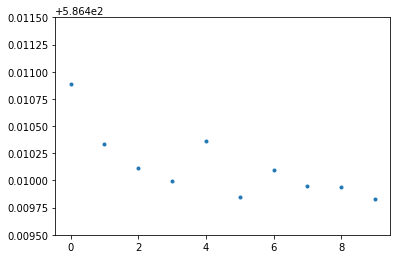

In [24]:
plt.plot(range(10), chis, '.');
plt.ylim(586.4095, 586.4115);